In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Concatenate

warnings.filterwarnings('ignore')

2024-04-15 10:19:39.422899: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:19:39.423071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:19:39.623116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
BASE_DIR = '/kaggle/input/anime-faces/data/'

In [24]:
# load complete image paths to the list
image_paths = []
for image_name in os.listdir(BASE_DIR):
    image_path = os.path.join(BASE_DIR, image_name)
    image_paths.append(image_path)

In [25]:
image_paths[:5]

['/kaggle/input/anime-faces/data/21130.png',
 '/kaggle/input/anime-faces/data/9273.png',
 '/kaggle/input/anime-faces/data/18966.png',
 '/kaggle/input/anime-faces/data/14127.png',
 '/kaggle/input/anime-faces/data/18054.png']

In [26]:
len(image_paths)

21552

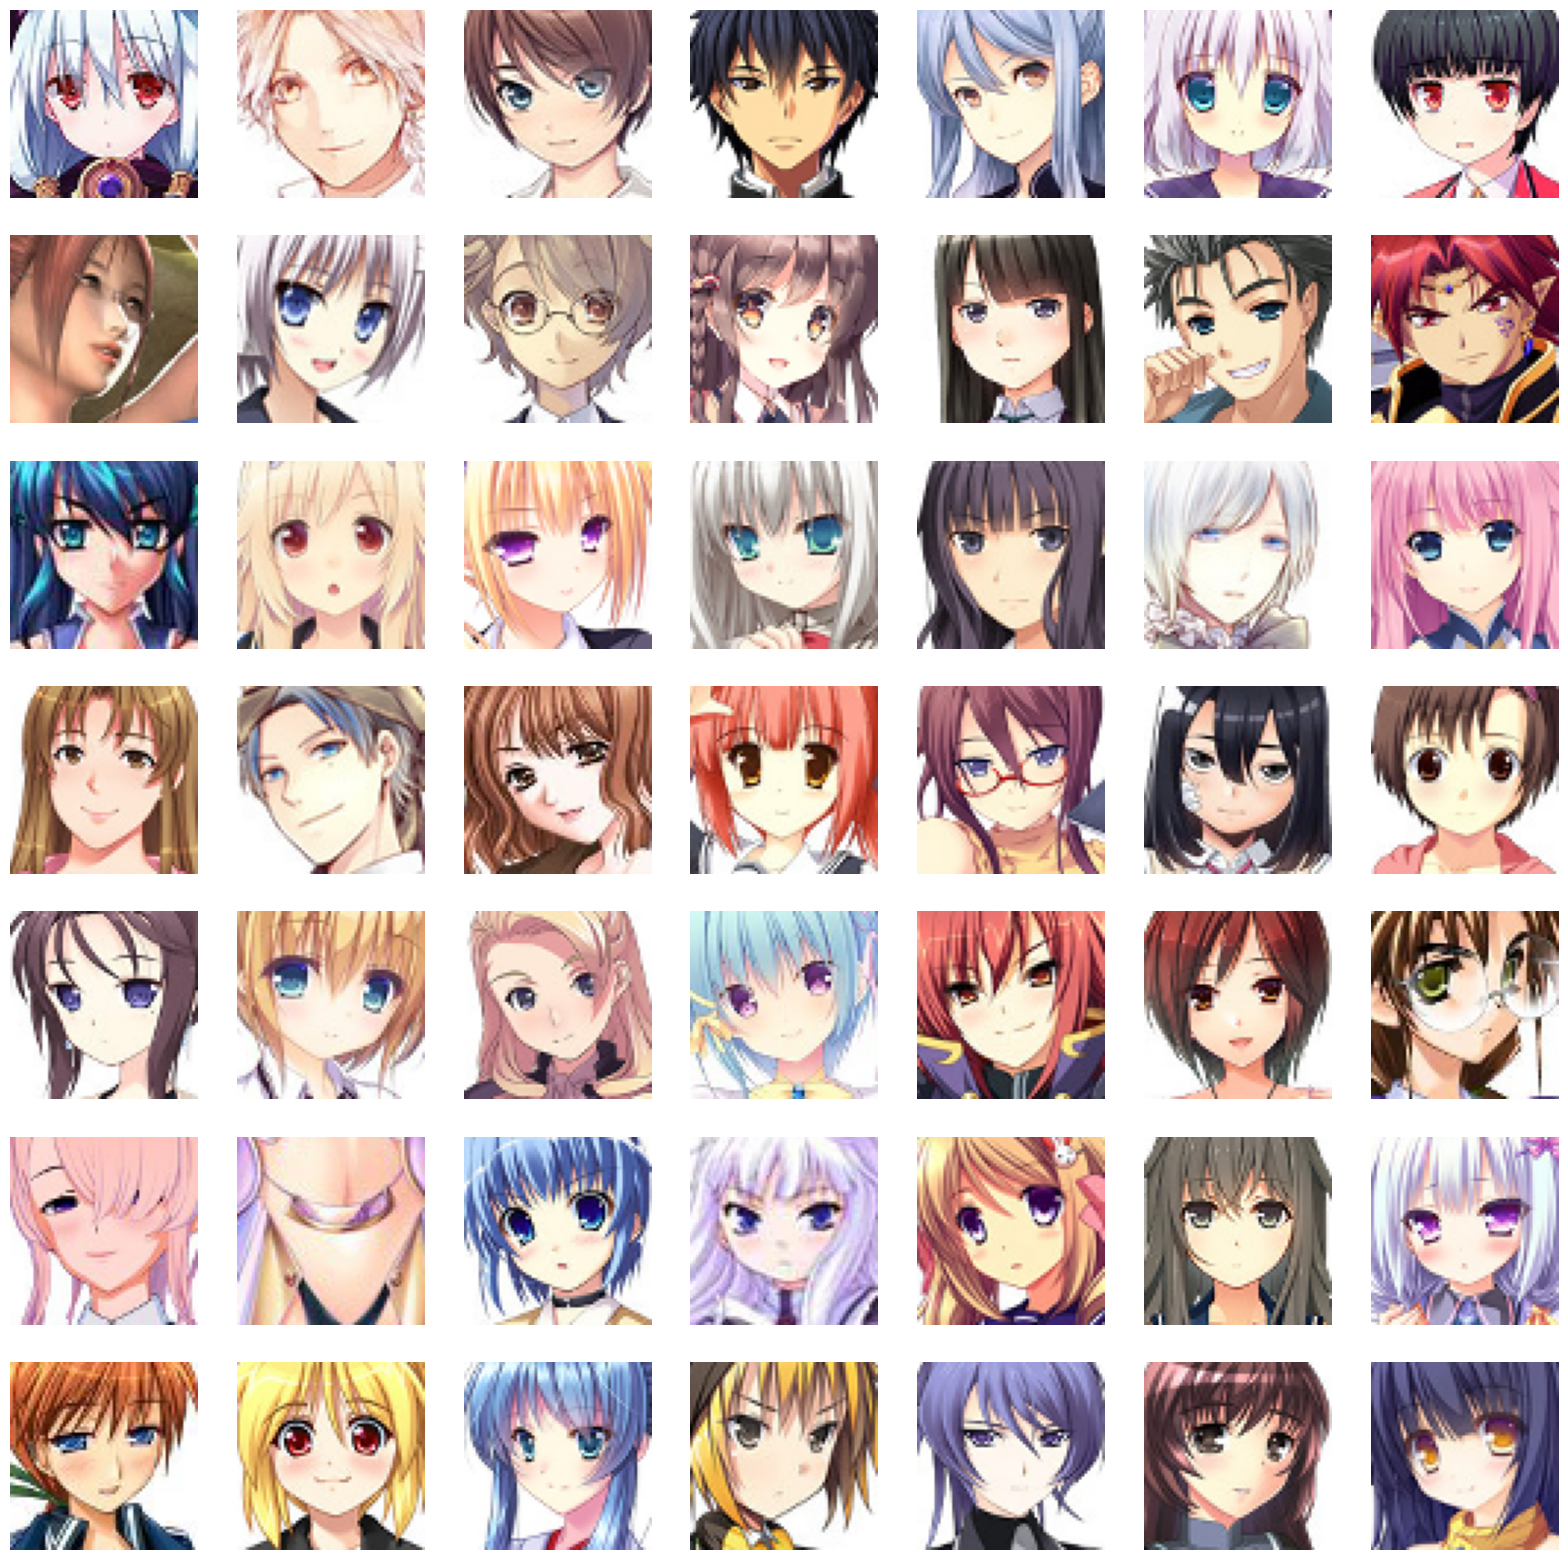

In [28]:
# to display grid of images (7x7)
plt.figure(figsize=(20, 20))
temp_images = image_paths[:49]
index = 1

for image_path in temp_images:
    plt.subplot(7, 7, index)
    # load the image
    img = load_img(image_path)
    # convert to numpy array
    img = np.array(img)
    # show the image
    plt.imshow(img)
    plt.axis('off')
    # increment the index for next image
    index += 1

In [31]:
import os

# List to store image file paths
image_paths = []

# Iterate over the directories containing the images
for root, dirs, files in os.walk('/kaggle/input/anime-faces/data/data'):
    for file in files:
        # Check if the file is an image file
        if file.endswith(('png', 'jpg', 'jpeg')):
            # Add the full path of the image file to image_paths
            image_paths.append(os.path.join(root, file))





# load the image and convert to numpy array
train_images = [np.array(load_img(path)) for path in tqdm(image_paths)]
train_images = np.array(train_images)

  0%|          | 0/21551 [00:00<?, ?it/s]

In [32]:
train_images[0].shape

(64, 64, 3)

In [33]:
# reshape the array
train_images = train_images.reshape(train_images.shape[0], 64, 64, 3).astype('float32')

In [34]:
# normalize the images
train_images = (train_images - 127.5) / 127.5

In [35]:
train_images[0]

array([[[-0.7254902 , -0.90588236, -0.7176471 ],
        [-0.70980394, -0.88235295, -0.6862745 ],
        [-0.7019608 , -1.        , -0.7176471 ],
        ...,
        [-0.09019608,  0.01176471,  0.3882353 ],
        [-0.19215687,  0.05882353,  0.4509804 ],
        [-0.34117648, -0.13725491,  0.29411766]],

       [[-0.7254902 , -0.90588236, -0.7176471 ],
        [-0.73333335, -0.8666667 , -0.7019608 ],
        [-0.52156866, -0.8666667 , -0.5686275 ],
        ...,
        [-0.29411766,  0.01176471,  0.3019608 ],
        [-0.08235294,  0.15294118,  0.5294118 ],
        [-0.23921569,  0.09019608,  0.45882353]],

       [[-0.7019608 , -0.8901961 , -0.7019608 ],
        [-0.7176471 , -0.8745098 , -0.69411767],
        [-0.5686275 , -0.8509804 , -0.58431375],
        ...,
        [-0.22352941,  0.1764706 ,  0.48235294],
        [-0.13725491,  0.1764706 ,  0.4745098 ],
        [-0.06666667,  0.24705882,  0.5058824 ]],

       ...,

       [[-0.30980393, -0.6862745 , -0.29411766],
        [-0

In [6]:
BASE_DIR2 = '/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie'

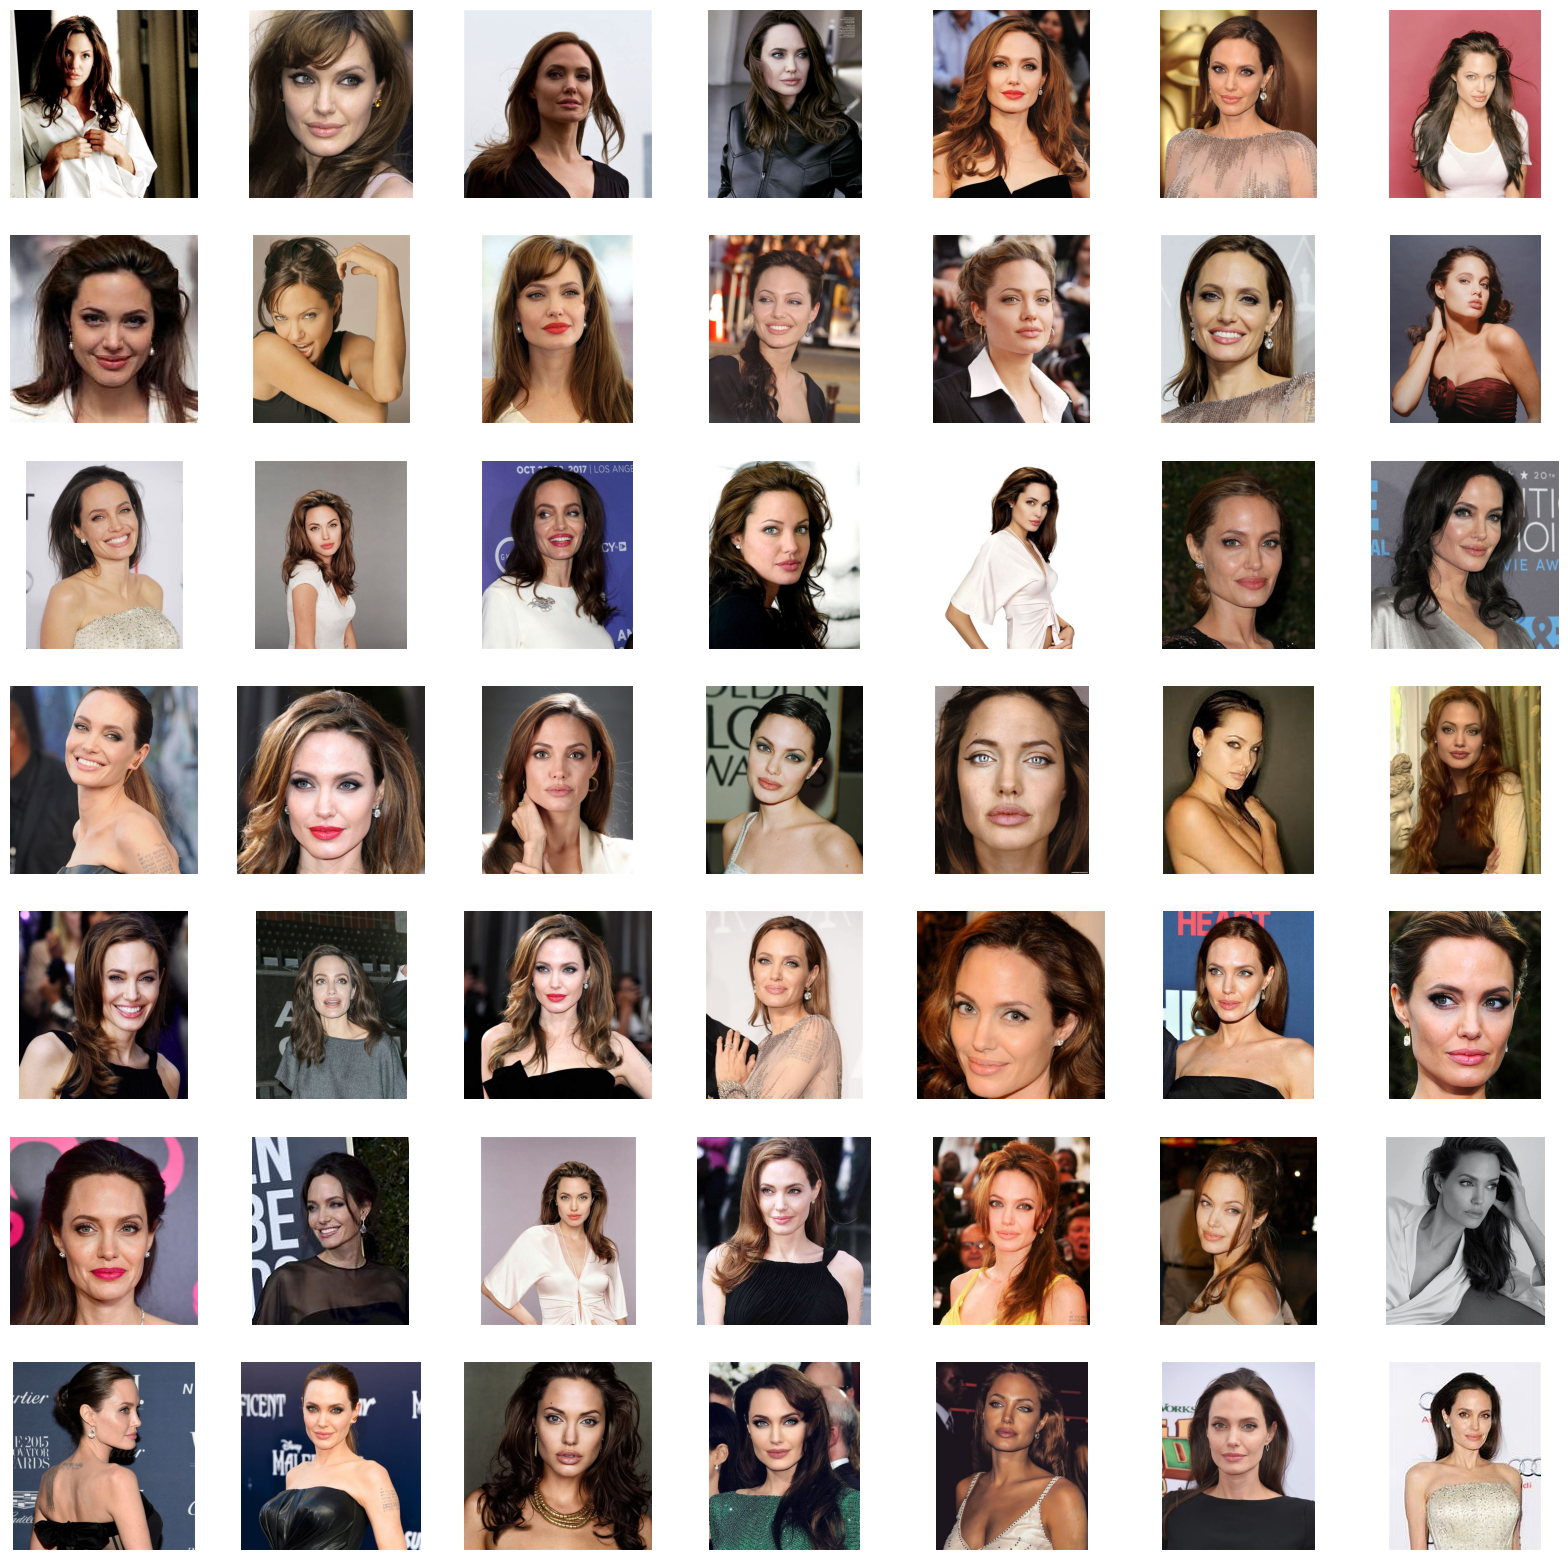

In [11]:
# to display grid of images (7x7)
plt.figure(figsize=(20, 20))
temp_images2 = image_paths2[:49]
index = 1

for image_paths2 in temp_images2:
    plt.subplot(7, 7, index)
    # load the image
    img2 = load_img(image_paths2)
    # convert to numpy array
    img2 = np.array(img2)
    # show the image
    plt.imshow(img2)
    plt.axis('off')
    # increment the index for next image
    index += 1

In [36]:
# latent dimension for random noise
LATENT_DIM = 100
# weight initializer
WEIGHT_INIT = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# no. of channels of the image
CHANNELS = 3 # for gray scale, keep it as 1

In [57]:

from tensorflow.keras.layers import Input, Conv2DTranspose, Conv2D, BatchNormalization, ReLU
from tensorflow.keras.models import Model

# Define the input shape
IMAGE_SHAPE = (64, 64, CHANNELS)

# Generator
image_input = Input(shape=IMAGE_SHAPE)

x = Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same')(image_input)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)


output = Conv2DTranspose(CHANNELS, (4, 4), strides=(2, 2), padding='same', activation='tanh')(x)


generator = Model(inputs=image_input, outputs=output, name='generator')
generator.summary()




Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 128, 128, 256)  │        12,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 256, 256, 128)  │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256, 256, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 512, 512, 64)   │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512, 512, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 1024, 1024, 3)  │         3,075 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,963 (2.57 MB)

 Trainable params: 672,067 (2.56 MB)

 Non-trainable params: 896 (3.50 KB)

In [46]:
model = Sequential(name='discriminator')
input_shape = (64, 64, 3)
alpha = 0.2

# create conv layers
model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

# output class
model.add(layers.Dense(1, activation='sigmoid'))

discriminator = model
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,081 (1.55 MB)

 Trainable params: 405,441 (1.55 MB)

 Non-trainable params: 640 (2.50 KB)

In [107]:
class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, input_shape):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.input_shape = input_shape
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
    
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # resize images to (64, 64)
        real_images_resized = tf.image.resize(real_images, (64, 64))
        
        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)
            
            # compute loss on fake images
            fake_images = self.generator(real_images, training=True)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            
            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
            
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))
        
        
        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            #pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)
            
        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))
        
        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

In [108]:
class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self,real_images,num_imgs=25,):
        self.num_imgs = num_imgs
        self.real_images = real_images
      

    def on_epoch_end(self, epoch, logs=None):        
        # select a random subset of real people's images
        idx = np.random.randint(0, self.real_images.shape[0], self.num_imgs)
        real_batch = self.real_images[idx]

        # generate anime style images from real people's images
        fake_images = self.model.generator(real_batch)
        # denormalize the images
        fake_images = (fake_images * 127.5) + 127.5
           
        fig = plt.figure(figsize=(8, 8))
        for i in range(self.num_imgs):
            plt.subplot(5, 5, i+1)
            img = array_to_img(fake_images[i])
            plt.imshow(img)
            plt.axis('off')
        # plt.savefig('epoch_{:03d}.png'.format(epoch))
        plt.show()
        
    def on_train_end(self, logs=None):
        self.model.generator.save('generator.h5')

In [109]:
dcgan = DCGAN(generator=generator, discriminator=discriminator, input_shape=img2)

In [110]:
D_LR = 0.0001 
G_LR = 0.0003
dcgan.compile(g_optimizer=Adam(learning_rate=G_LR, beta_1=0.5), d_optimizer=Adam(learning_rate=D_LR, beta_1=0.5), loss_fn=BinaryCrossentropy())

In [111]:
N_EPOCHS = 2
dcgan.fit(train_images, epochs=N_EPOCHS, callbacks=[DCGANMonitor(img2)])

Epoch 1/2


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 8192, but received input with shape (None, 2097152)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1024, 1024, 3), dtype=float32)
  • training=True
  • mask=None

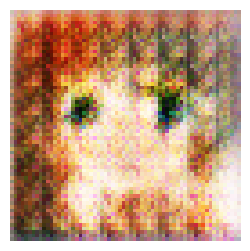

In [27]:
noise = tf.random.normal([1, 100])
fig = plt.figure(figsize=(3, 3))
# generate the image from noise
g_img = dcgan.generator(noise)
# denormalize the image
g_img = (g_img * 127.5) + 127.5
g_img.numpy()
img = array_to_img(g_img[0])
plt.imshow(img)
plt.axis('off')
# plt.savefig('epoch_{:03d}.png'.format(epoch))
plt.show()